# Assignment 2.2: Occupancy Map


TEAM-ID: 16 <br>
TEAM-NAME: spacex  <br>
YOUR-ID: 2019121004 , 2018102002  <br>
YOUR-NAME: Avani Gupta, Sreeharsha Paruchuri  <br> 

In [16]:
import open3d as o3d
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#()

In [19]:
def one_one(file):
    pcd = o3d.io.read_point_cloud(file)
    o3d.visualization.draw_geometries([pcd])
    return pcd
path = '../Assignment_2.1/'
pcdf = one_one(path+"pcd.ply")

(4239, 3)
min x -77.25965836009522 max X 84.54077056339088 min y -6.140419797061123 max y 7.137396319004097 minZ -67.3731480802381 and maxZ 90.25556998798255


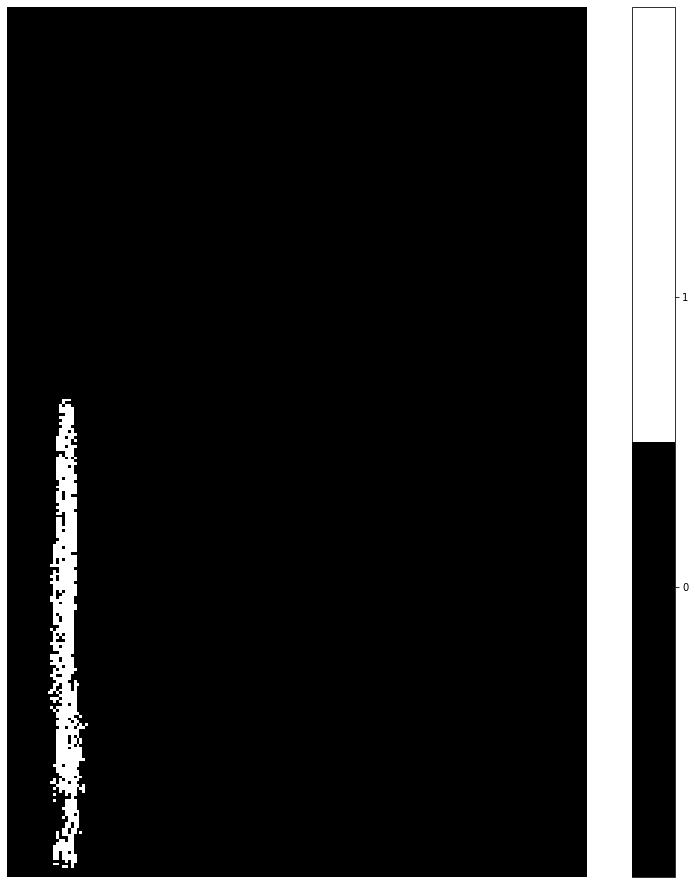

In [18]:
points = np.asarray(pcdf.points)
#o3d.visualization.draw_geometries([pcdf])
print(points.shape)
occMap = np.zeros((300, 200))
maxX = 0
maxY = 0
maxZ = 0
minX = 1000
minY = 1000
minZ = 1000
for p in points:
	occMap[int(p[0]) + 80][int(p[1]) + 20] += 1
	if maxX < p[0]:
		maxX = p[0]
	if maxY < p[1]:
	    maxY = p[1]
	if maxZ < p[2]:
		maxZ = p[2]
	if minX > p[0]:
	    minX = p[0]
	if minY > p[1]:
	    minY = p[1]
	if minZ > p[2]:
		minZ = p[2]

print(f"min x {minX} max X {maxX} min y {minY} max y {maxY} minZ {minZ} and maxZ {maxZ}")

for i in range(200):
	for j in range(200):
		if occMap[i][j] > 0:
			occMap[i][j] = 1
		else:
			occMap[i][j] = 0
            
fig = plt.figure(figsize=(16,16))
cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap',['black','white'],256)
bounds=[-1,0.5, 2]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# tell imshow about color map so that only set colors are used
img = plt.imshow(occMap,interpolation='nearest',
                    cmap = cmap,norm=norm,origin='lower')

# make a color bar
fig.colorbar(img,cmap=cmap,
                norm=norm,boundaries=bounds,ticks=[0,1])
plt.axis("off") 
plt.show()
